In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV

from yellowbrick.cluster import *
from yellowbrick.classifier import ROCAUC, DiscriminationThreshold
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from yellowbrick.datasets import load_occupancy, load_energy, load_credit
from yellowbrick.classifier import ClassificationReport, PrecisionRecallCurve
from yellowbrick.regressor import PredictionError, ResidualsPlot, AlphaSelection

# Check if fitted on Classifiers

In [2]:
X, y = load_occupancy(return_dataset=True).to_numpy()
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20)

In [3]:
unfitted_model = LogisticRegression(solver='lbfgs')
fitted_model = unfitted_model.fit(X_train, y_train)

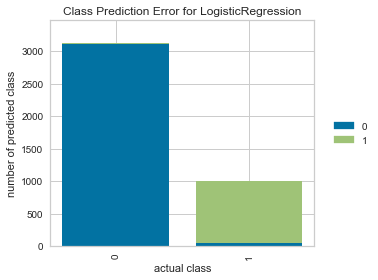

In [4]:
oz = ClassPredictionError(fitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

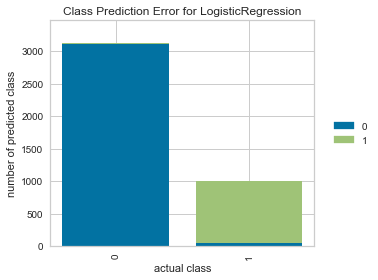

In [5]:
oz = ClassPredictionError(unfitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

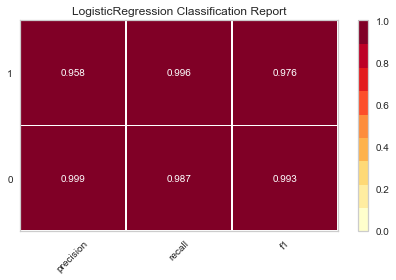

In [6]:
oz = ClassificationReport(fitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

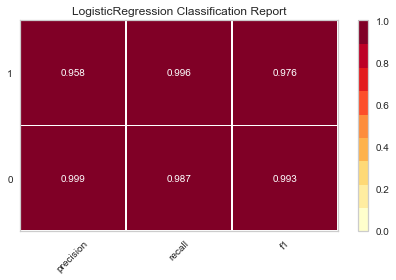

In [7]:
oz = ClassificationReport(unfitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

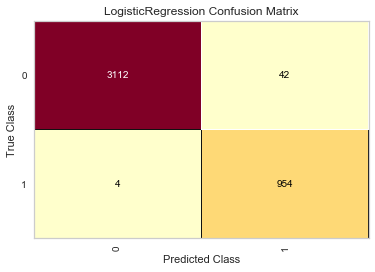

In [8]:
oz = ConfusionMatrix(fitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

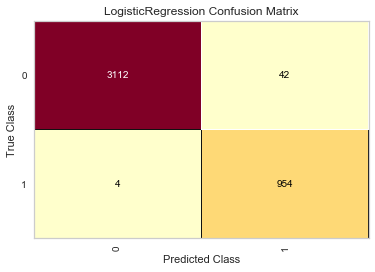

In [9]:
oz = ConfusionMatrix(unfitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

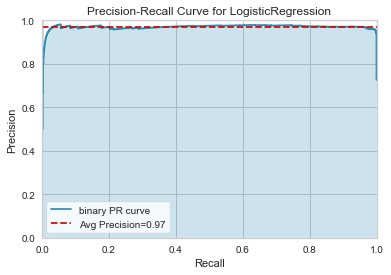

In [10]:
oz = PrecisionRecallCurve(fitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

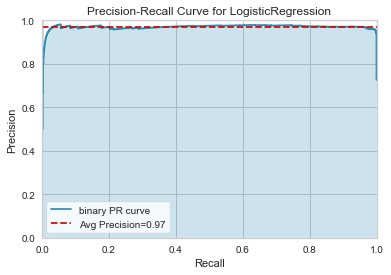

In [11]:
oz = PrecisionRecallCurve(unfitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

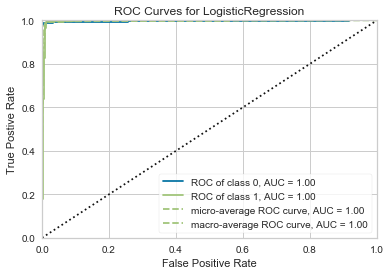

In [12]:
oz = ROCAUC(fitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

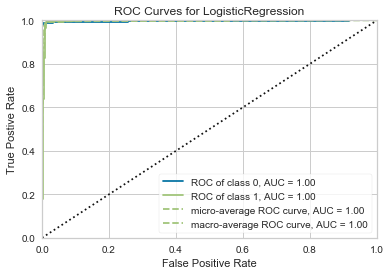

In [13]:
oz = ROCAUC(unfitted_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

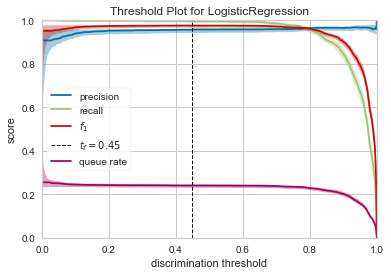

In [14]:
oz = DiscriminationThreshold(fitted_model)
oz.fit(X, y)
oz.poof()

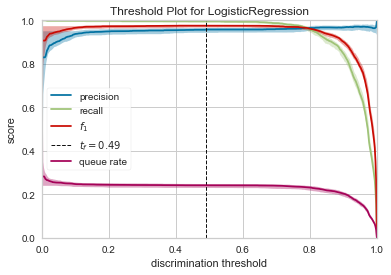

In [15]:
oz = DiscriminationThreshold(unfitted_model)
oz.fit(X, y)
oz.poof()

# Check if fitted on Regressors

In [16]:
X, y = load_energy(return_dataset=True).to_numpy()
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20)

In [17]:
unfitted_nonlinear_model = RandomForestRegressor(n_estimators=10)
fitted_nonlinear_model = unfitted_nonlinear_model.fit(X_train, y_train)

In [18]:
unfitted_linear_model = Lasso()
fitted_linear_model = unfitted_linear_model.fit(X_train, y_train)

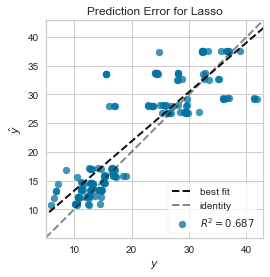

In [19]:
oz = PredictionError(unfitted_linear_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

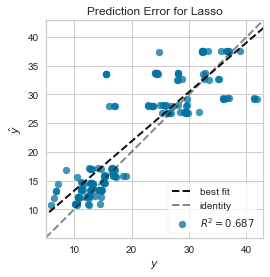

In [20]:
oz = PredictionError(fitted_linear_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

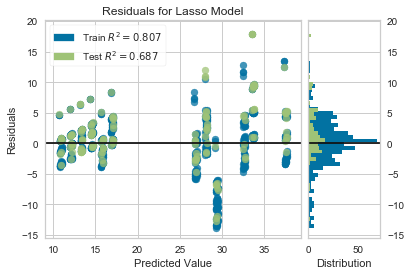

In [21]:
oz = ResidualsPlot(unfitted_linear_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

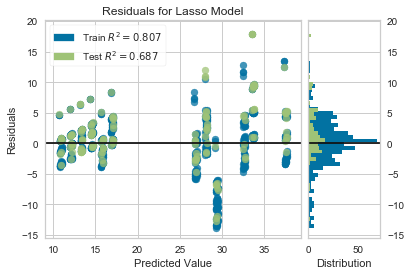

In [22]:
oz = ResidualsPlot(fitted_linear_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

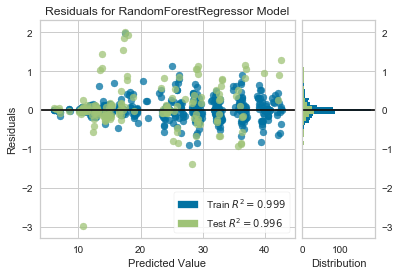

In [23]:
oz = ResidualsPlot(unfitted_nonlinear_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

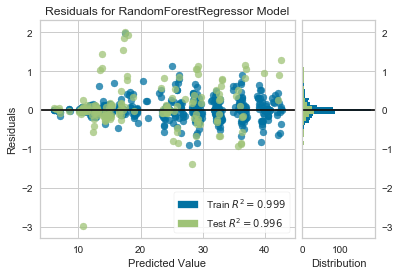

In [24]:
oz = ResidualsPlot(fitted_nonlinear_model)
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.poof()

In [25]:
unfitted_cv_model = LassoCV(alphas=[.01,1,10], cv=3)
fitted_cv_model = unfitted_cv_model.fit(X, y)

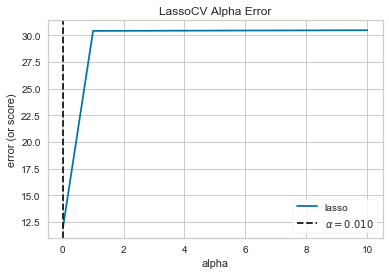

In [26]:
oz = AlphaSelection(unfitted_cv_model)
oz.fit(X, y)
oz.poof()

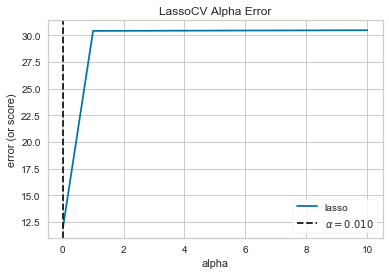

In [27]:
oz = AlphaSelection(fitted_cv_model)
oz.fit(X, y)
oz.poof()

# Check if fitted on Clusterers

In [28]:
X, _ = load_credit(return_dataset=True).to_numpy()

In [29]:
unfitted_cluster_model = KMeans(6)
fitted_cluster_model = unfitted_cluster_model.fit(X)

In [30]:
# NOTE: Not sure how to deal with K-Elbow and prefitted models...

# visualizer = KElbowVisualizer(unfitted_cluster_model, k=(4,12))
# visualizer.fit(X)
# visualizer.poof()

In [31]:
# visualizer = KElbowVisualizer(fitted_cluster_model, k=(4,12))
# visualizer.fit(X)
# visualizer.poof()

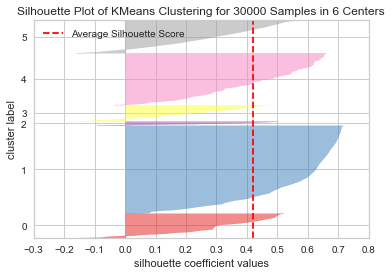

In [32]:
# NOTE: Silhouette Scores doesn't have a quick method
visualizer = SilhouetteVisualizer(unfitted_cluster_model)
visualizer.fit(X)
visualizer.poof()

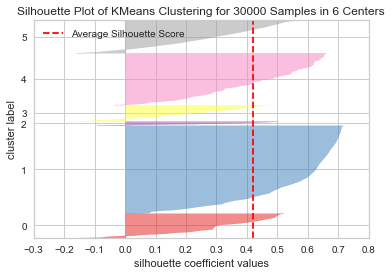

In [33]:
visualizer = SilhouetteVisualizer(fitted_cluster_model)
visualizer.fit(X)
visualizer.poof()

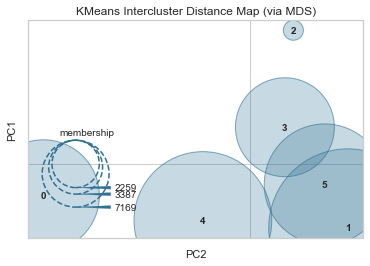

In [34]:
visualizer = InterclusterDistance(unfitted_cluster_model)
visualizer.fit(X)
visualizer.poof()

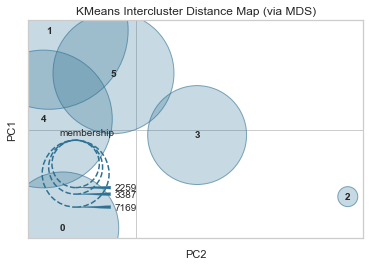

In [35]:
visualizer = InterclusterDistance(fitted_cluster_model)
visualizer.fit(X)
visualizer.poof()

# Check if fitted on Target Visualizers